In [1]:
import sys

import numpy as np
import pandas as pd

# pip install statsmodels
from statsmodels.tsa.holtwinters import Holt

import matplotlib.pyplot as plt

sys.path.append("..")
from utils import create_onedrive_directdownload

plt.style.use("ggplot")

In [2]:
onedrive_link = "https://1drv.ms/u/s!AiqdXCxPTydhofYbhA1ASJ6RZ3OjTw?e=Kf4ZBa"
direct_use_link = create_onedrive_directdownload(onedrive_link)
print(direct_use_link)
df = pd.read_csv(direct_use_link, index_col="Month", parse_dates=True)

df.head()

https://api.onedrive.com/v1.0/shares/u!aHR0cHM6Ly8xZHJ2Lm1zL3UvcyFBaXFkWEN4UFR5ZGhvZlliaEExQVNKNlJaM09qVHc_ZT1LZjRaQmE/root/content


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# no particular reason to choose 0.2
alpha = 0.2

In [5]:
# Set the frequency
df.index.freq = 'MS'

holt = Holt(
    df["Passengers"],
    initialization_method="legacy-heuristic"
)

res_h = holt.fit()

df["Holt"] = res_h.fittedvalues

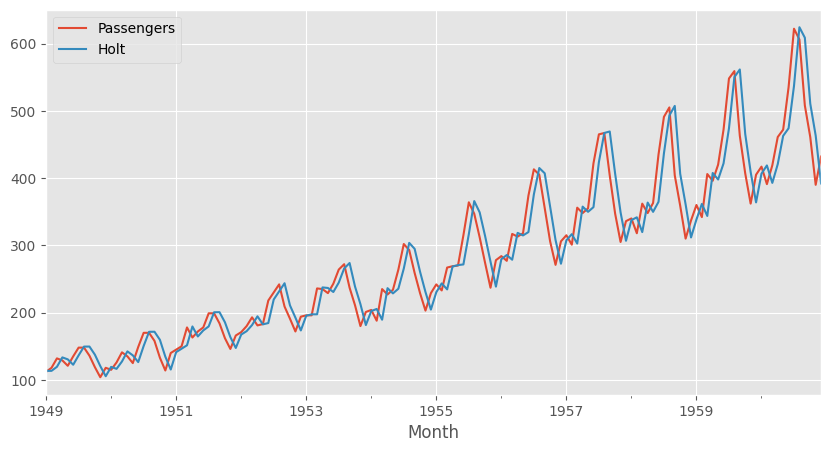

In [6]:
df[["Passengers", "Holt"]].plot(figsize=(10, 5));

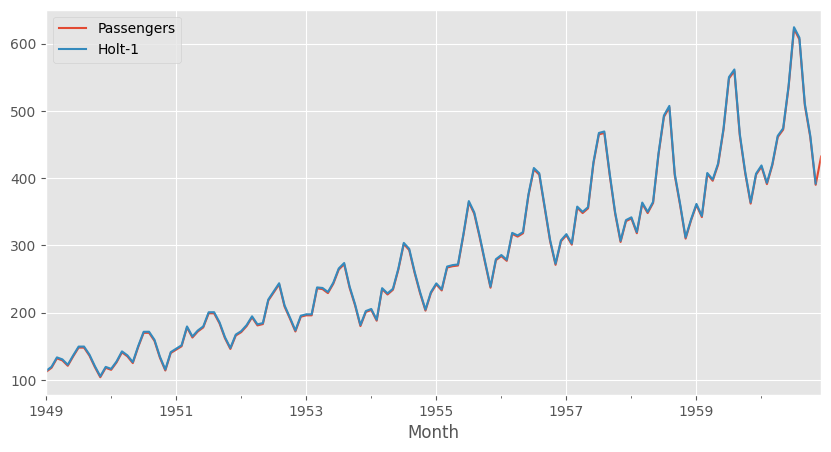

In [7]:
### No!
df["Holt-1"] = df["Holt"].shift(-1)
df[["Passengers", "Holt-1"]].plot(figsize=(10, 5));

In [8]:
# create training and test set
N_test = 12
train = df.iloc[:-N_test]
test  = df.iloc[-N_test:]

In [9]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx  = df.index > train.index[-1]

In [10]:
holt = Holt(
    train["Passengers"],
    initialization_method="legacy-heuristic"
)
res_h = holt.fit()

df.loc[train_idx, "Holt"] = res_h.fittedvalues
df.loc[test_idx, "Holt"] = res_h.forecast(N_test)

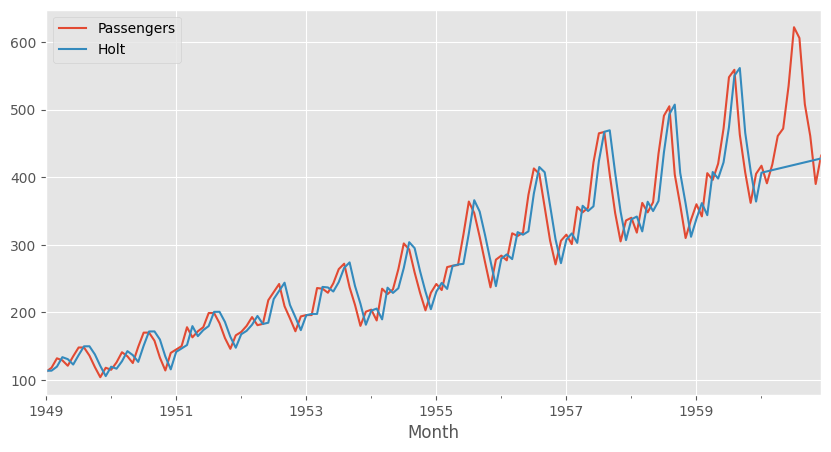

In [11]:
df[["Passengers", "Holt"]].plot(figsize=(10,5));